In [1]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import plotly.express as px


import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [2]:
#Read in the csv file and convert to a Pandas dataframe
ftblh_df = pd.read_csv('./data/final_data.csv')

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [3]:
ftblh_df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [4]:
ftblh_df.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

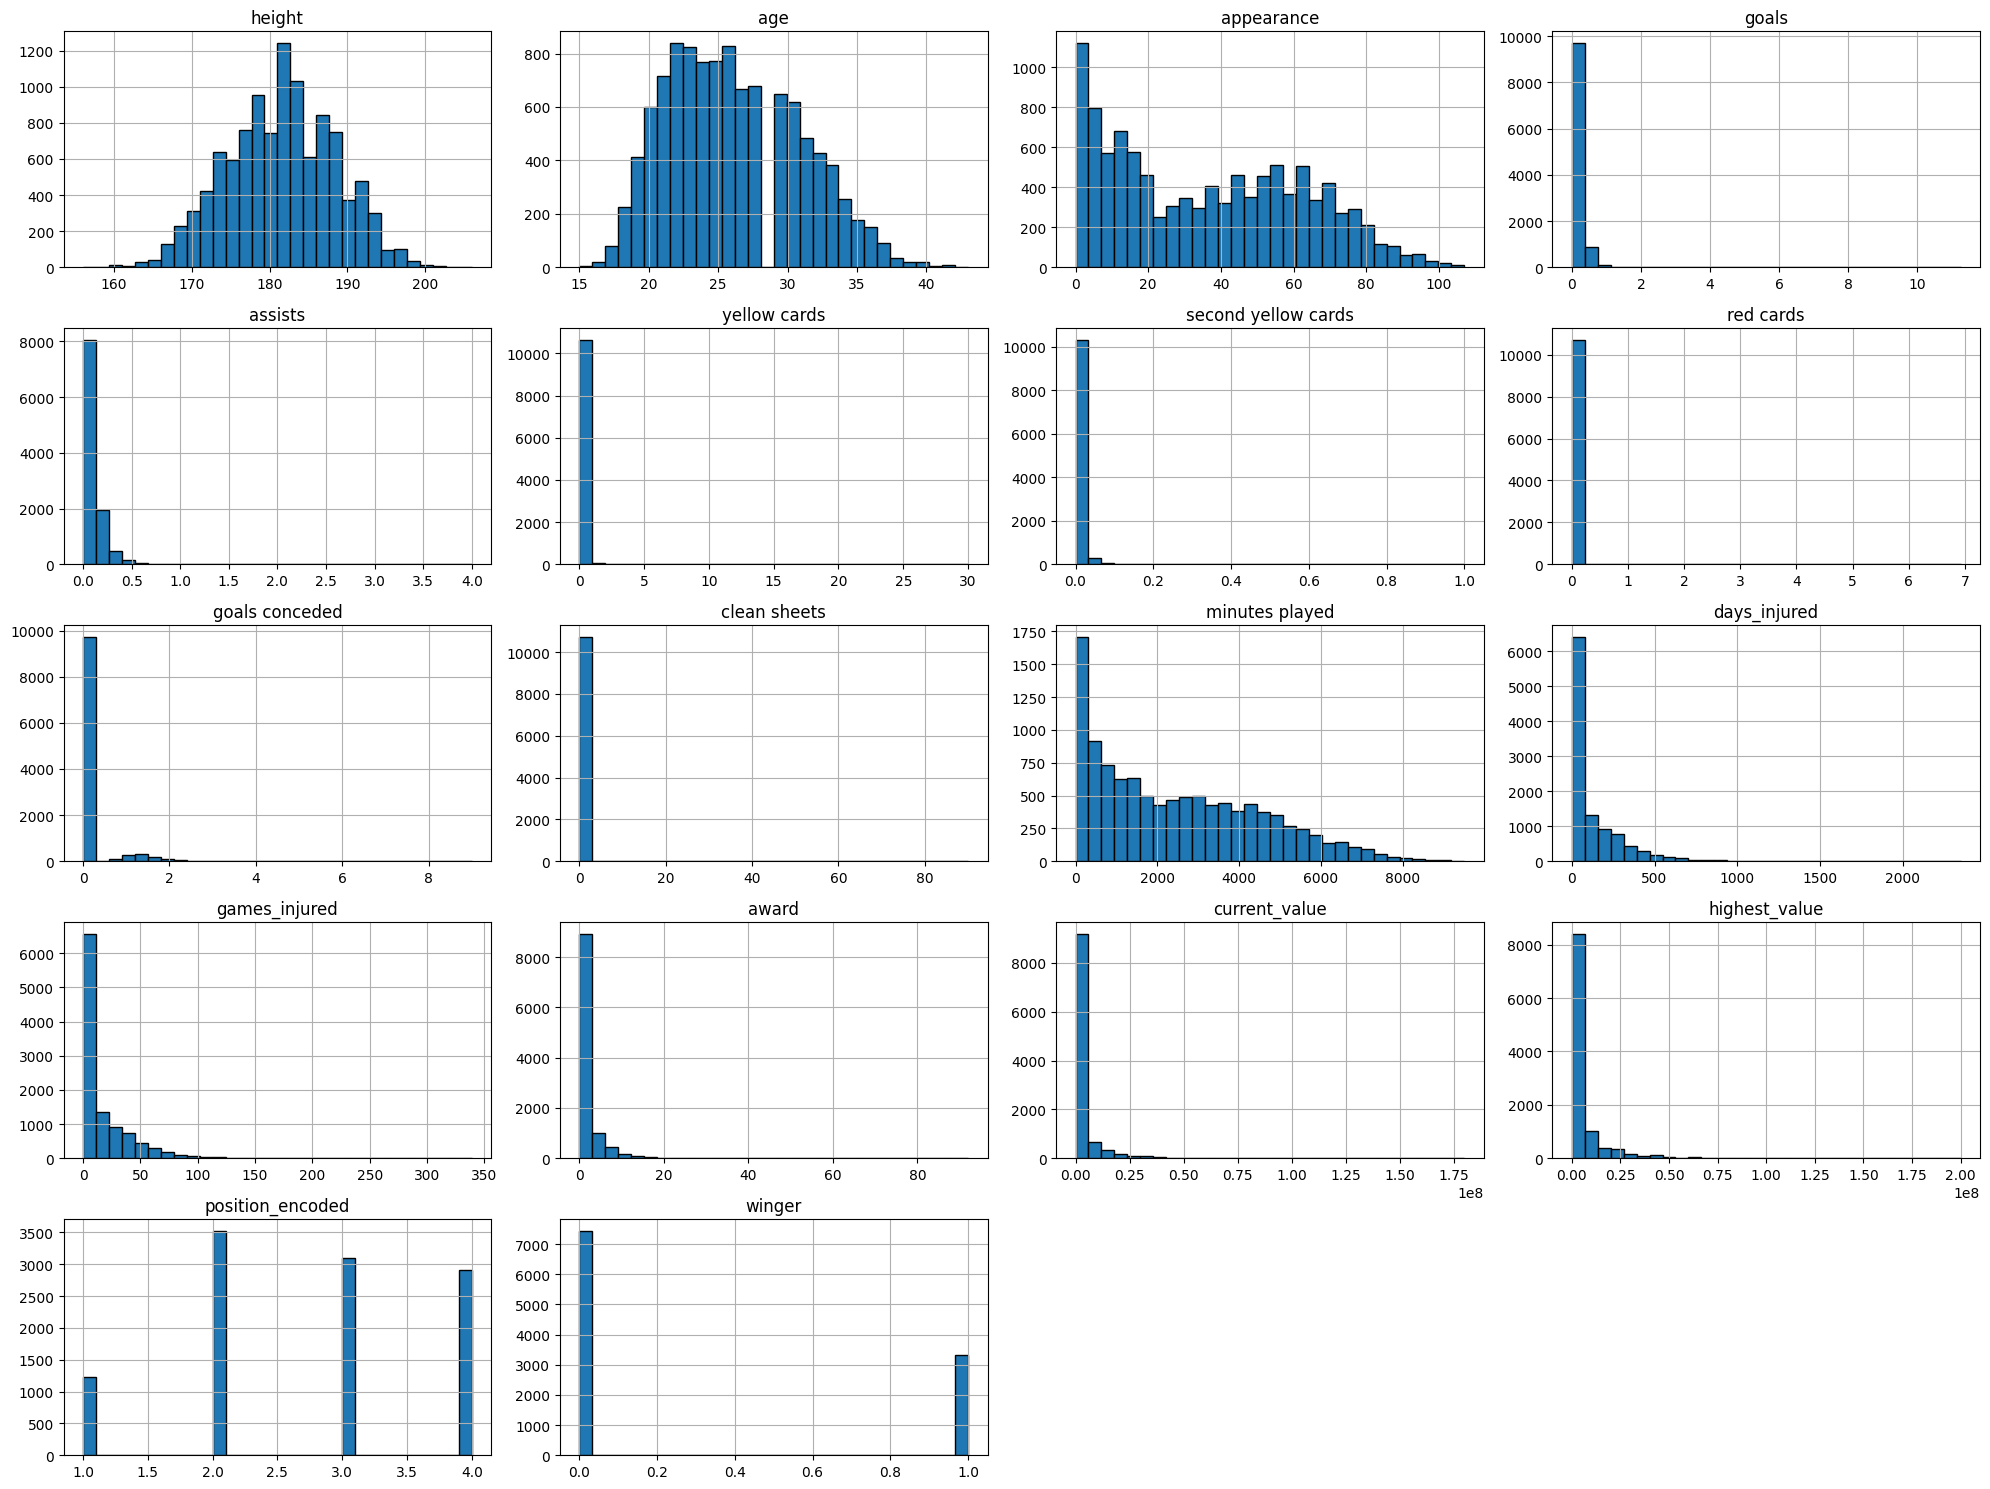

In [5]:
ftblh_df.hist(figsize=(20, 15), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [6]:
# Data source is from https://www.kaggle.com/datasets/khanghunhnguyntrng/football-players-transfer-fee-prediction-dataset
# Therfore, it's reliable

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [7]:
# The data is up-to-date, given that the problem statement is to predict the current value of a player.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [8]:
# N/A

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [9]:
# Sample appropriateness: The sample is appropriate for the problem statement. The data contains information about football players and their transfer fees. The data is relevant to the problem statement.
# Variable selection: some of the variables arn't relevant to the problem statement. For example, ['player', 'name', 'team', 'winger', 'position_encoded']

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [10]:
# Go to delete duplicates columns
ftblh_df.duplicated().sum()
# No duplicates found, therefore it's unique

0

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [11]:
#Display number missing values per column
ftblh_df.isnull().sum()
# No missing values found

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [12]:
# check columns types 
ftblh_df.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [13]:
ftblh_df.shape

(10754, 22)

In [14]:
# Drop columns that are not relevant to predicting the transfer fee of a player
columns_to_drop = ['player', 'name', 'team', 'winger', 'position_encoded']
ftblh_df.drop(columns=columns_to_drop, inplace=True)

In [15]:
ftblh_df.shape

(10754, 17)

In [16]:
ftblh_df_before_cleaning = ftblh_df.copy()

In [17]:
# Remove outliers
ftblh_df = ftblh_df[(ftblh_df['appearance'] <= 80)]
ftblh_df = ftblh_df[(ftblh_df['goals'] <= 0.75)]
ftblh_df = ftblh_df[ftblh_df['assists'] <= 0.3]
ftblh_df = ftblh_df[ftblh_df['yellow cards'] <= 0.6]
ftblh_df = ftblh_df[ftblh_df['second yellow cards'] <= 0.1]
ftblh_df = ftblh_df[ftblh_df['red cards'] <= 0.1]
ftblh_df = ftblh_df[ftblh_df['goals conceded'] <= 2]
ftblh_df = ftblh_df[ftblh_df['clean sheets'] <= 5]
ftblh_df = ftblh_df[ftblh_df['minutes played'] <= 6000]
ftblh_df = ftblh_df[ftblh_df['days_injured'] <= 325]
ftblh_df = ftblh_df[ftblh_df['games_injured'] <= 100]
ftblh_df = ftblh_df[ftblh_df['award'] <= 5]
ftblh_df = ftblh_df[ftblh_df['current_value'] <= 0.25 * 10**7]
ftblh_df = ftblh_df[ftblh_df['highest_value'] <= 0.25 * 10**7]

In [18]:
ftblh_df.shape

(5290, 17)

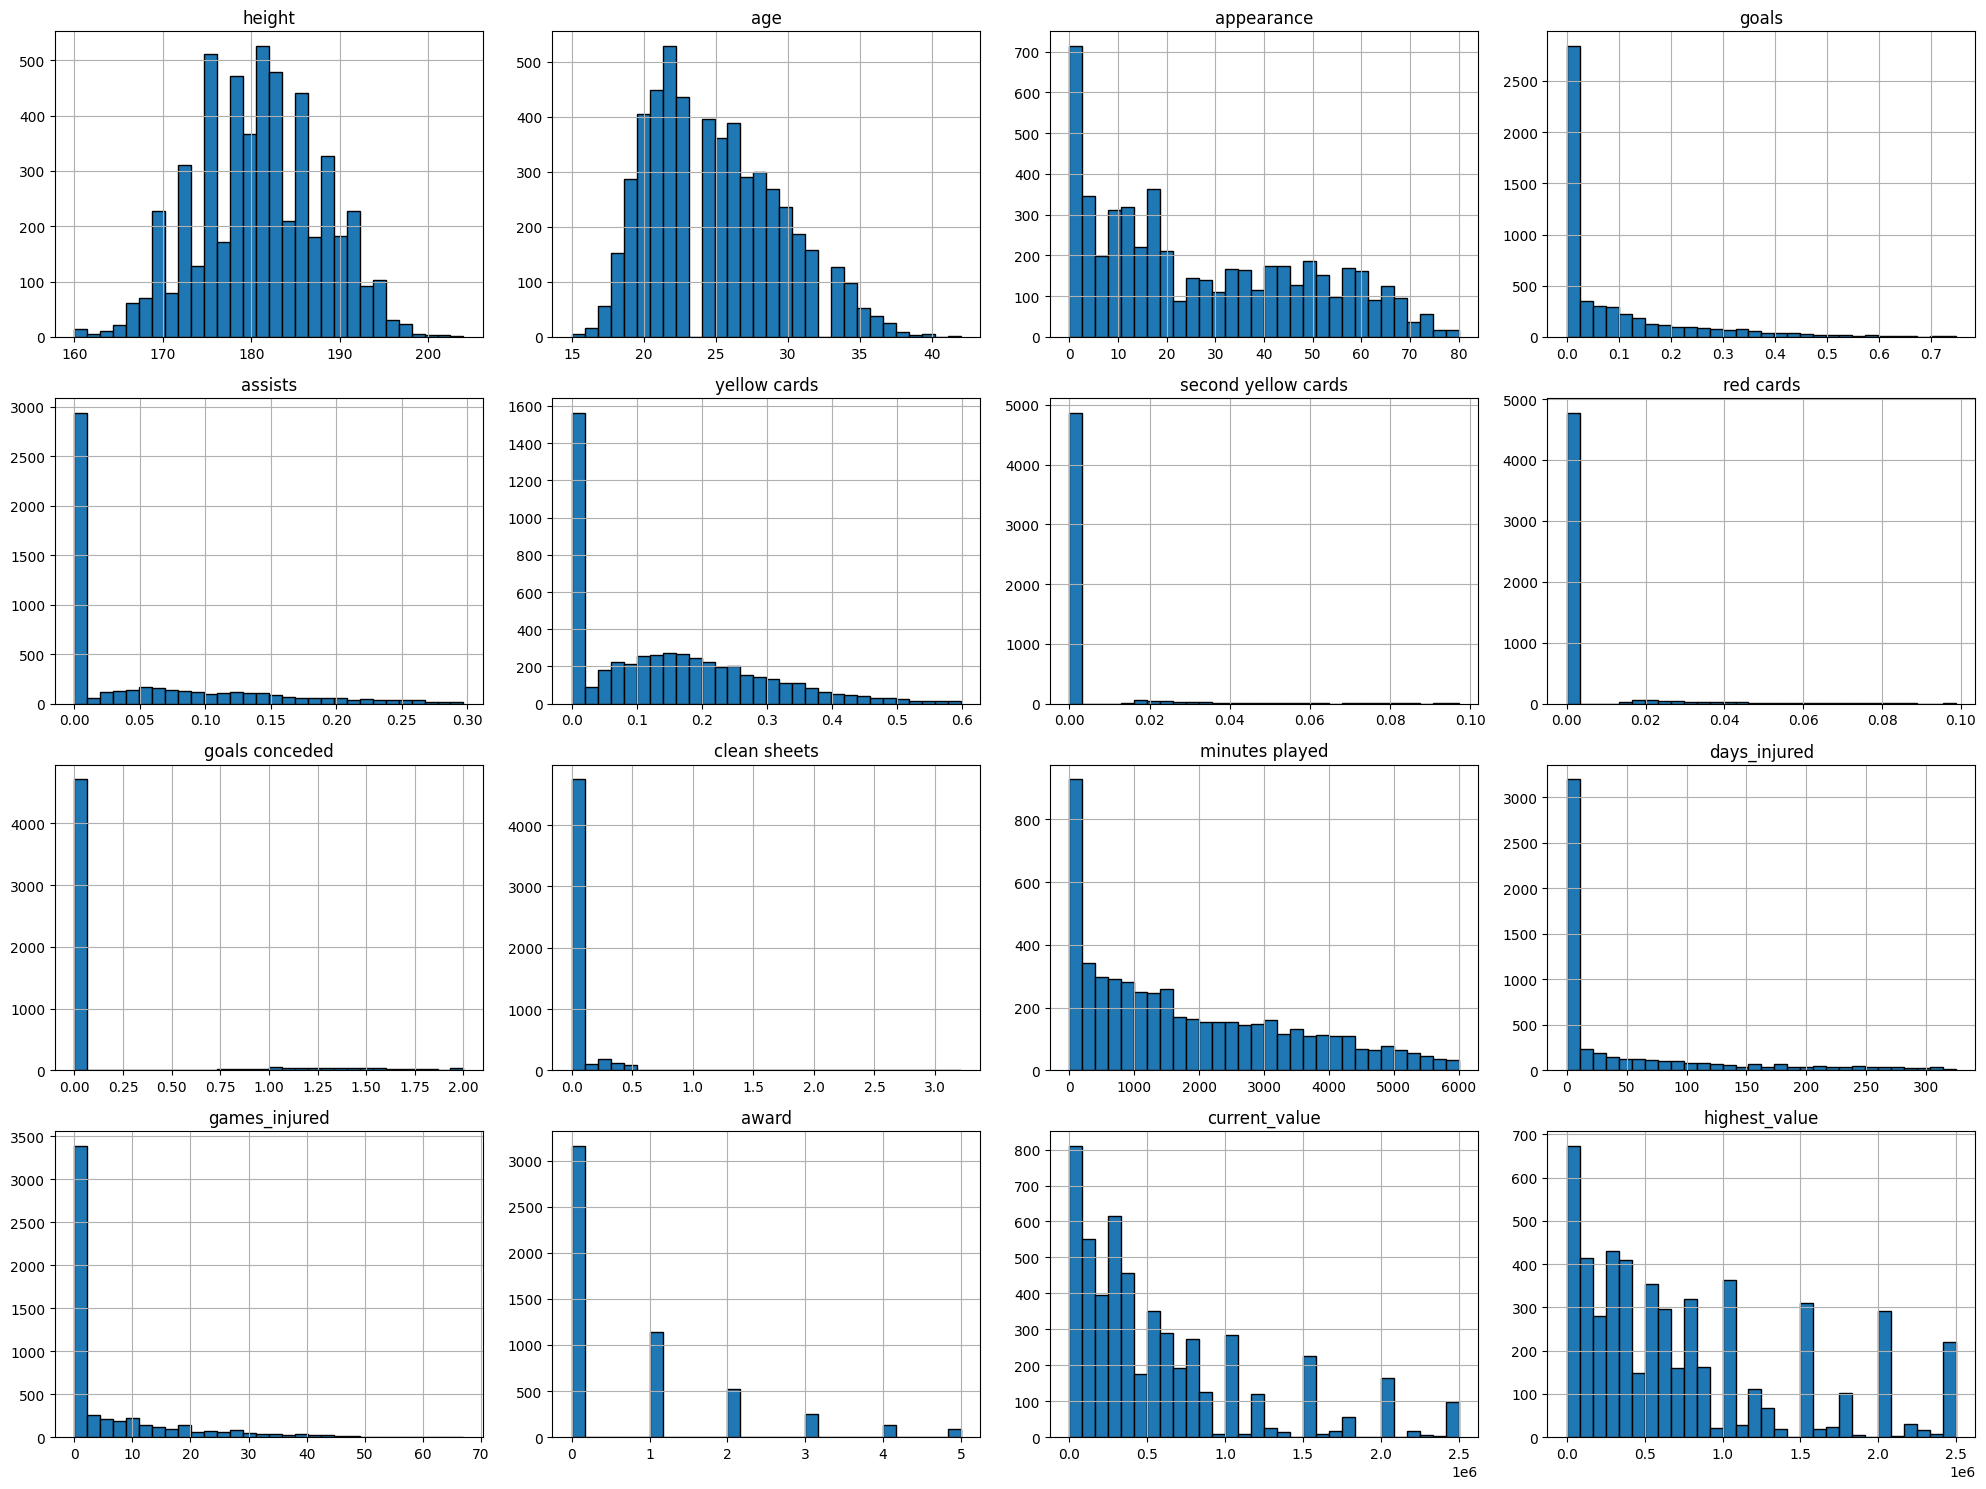

In [19]:
ftblh_df.hist(figsize=(20, 15), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

In [20]:
# Define the age bins and labels
bins = [15, 20, 25, 30, 35, 40]
labels = ['15-19', '20-24', '25-29', '30-34', '35-39']

# Create the categorical age group column
ftblh_df['age_group'] = pd.cut(ftblh_df['age'], bins=bins, labels=labels, right=True, include_lowest=True)

In [21]:
# second yellow cards are dependent on red cards, so we can drop it
ftblh_df.drop(columns=['second yellow cards'], inplace=True)

In [22]:
# binary representation of red cards
ftblh_df['red cards'] = ftblh_df['red cards'].apply(lambda x: 1 if x > 0 else 0)

In [23]:
# binary representation of clean sheets
ftblh_df['clean sheets'] = ftblh_df['clean sheets'].apply(lambda x: 1 if x > 0 else 0)

In [24]:
# binary representation of goals conceded
ftblh_df['goals conceded'] = ftblh_df['goals conceded'].apply(lambda x: 1 if x > 0 else 0)

In [25]:
ftblh_df['red cards'].value_counts()

red cards
0    4777
1     513
Name: count, dtype: int64

In [26]:
ftblh_df.head()

,position,height,age,appearance,goals,assists,yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,age_group
8,Defender Centre-Back,186.0,21.0,34,0.000000,0.000000,0.130529,0,0,0,2758,47,13,0,2000000,2000000,20-24
20,midfield-CentralMidfield,181.0,20.0,39,0.129125,0.064562,0.225968,0,0,0,2788,0,0,1,800000,800000,15-19
21,midfield-CentralMidfield,175.0,18.0,51,0.153759,0.102506,0.000000,0,0,0,3512,0,0,1,800000,800000,15-19
55,Goalkeeper,191.0,25.0,65,0.000000,0.000000,0.015340,0,1,1,5867,0,0,0,2000000,2000000,20-24
84,Goalkeeper,190.0,21.0,17,0.000000,0.000000,0.000000,0,1,1,1530,42,10,0,400000,400000,20-24


In [27]:
ftblh_df.dtypes

position            object
height             float64
age                float64
appearance           int64
goals              float64
assists            float64
yellow cards       float64
red cards            int64
goals conceded       int64
clean sheets         int64
minutes played       int64
days_injured         int64
games_injured        int64
award                int64
current_value        int64
highest_value        int64
age_group         category
dtype: object

# Insight 1:

## Before & After Cleaning (see below)

During our data cleaning process, we observed significant differences in the distribution of the "yellow cards" column, which highlight the impact of our efforts:

1. **Before Cleaning**:
   - Initially, the data showed a high concentration of values close to 0, with a gradual decrease as values increased. This spread suggested the presence of noise or possibly incorrect fractional values that did not align with typical yellow card counts.
   - Most entries fell between 0 and 3, which raised concerns about data accuracy, as yellow card counts are expected to be whole numbers.

2. **After Cleaning**:
   - After applying the necessary cleaning steps, the distribution shifted, with values clustering around whole numbers, particularly near 0, which aligns with typical patterns in sports data.
   - The range extended up to 30, reflecting the realistic count of yellow cards without unusual fractional or outlier values.

3. **Key Outcomes**:
   - By removing erroneous entries and standardizing the values, we achieved a more accurate distribution that better represents real-world data.
   - This cleaned dataset provides a more reliable foundation for analysis, as it now reflects expected patterns in yellow card counts, ensuring that future analyses are based on credible data.

Our data cleaning process has successfully refined the "yellow cards" column, improving its alignment with realistic values and enhancing the overall quality of the dataset.


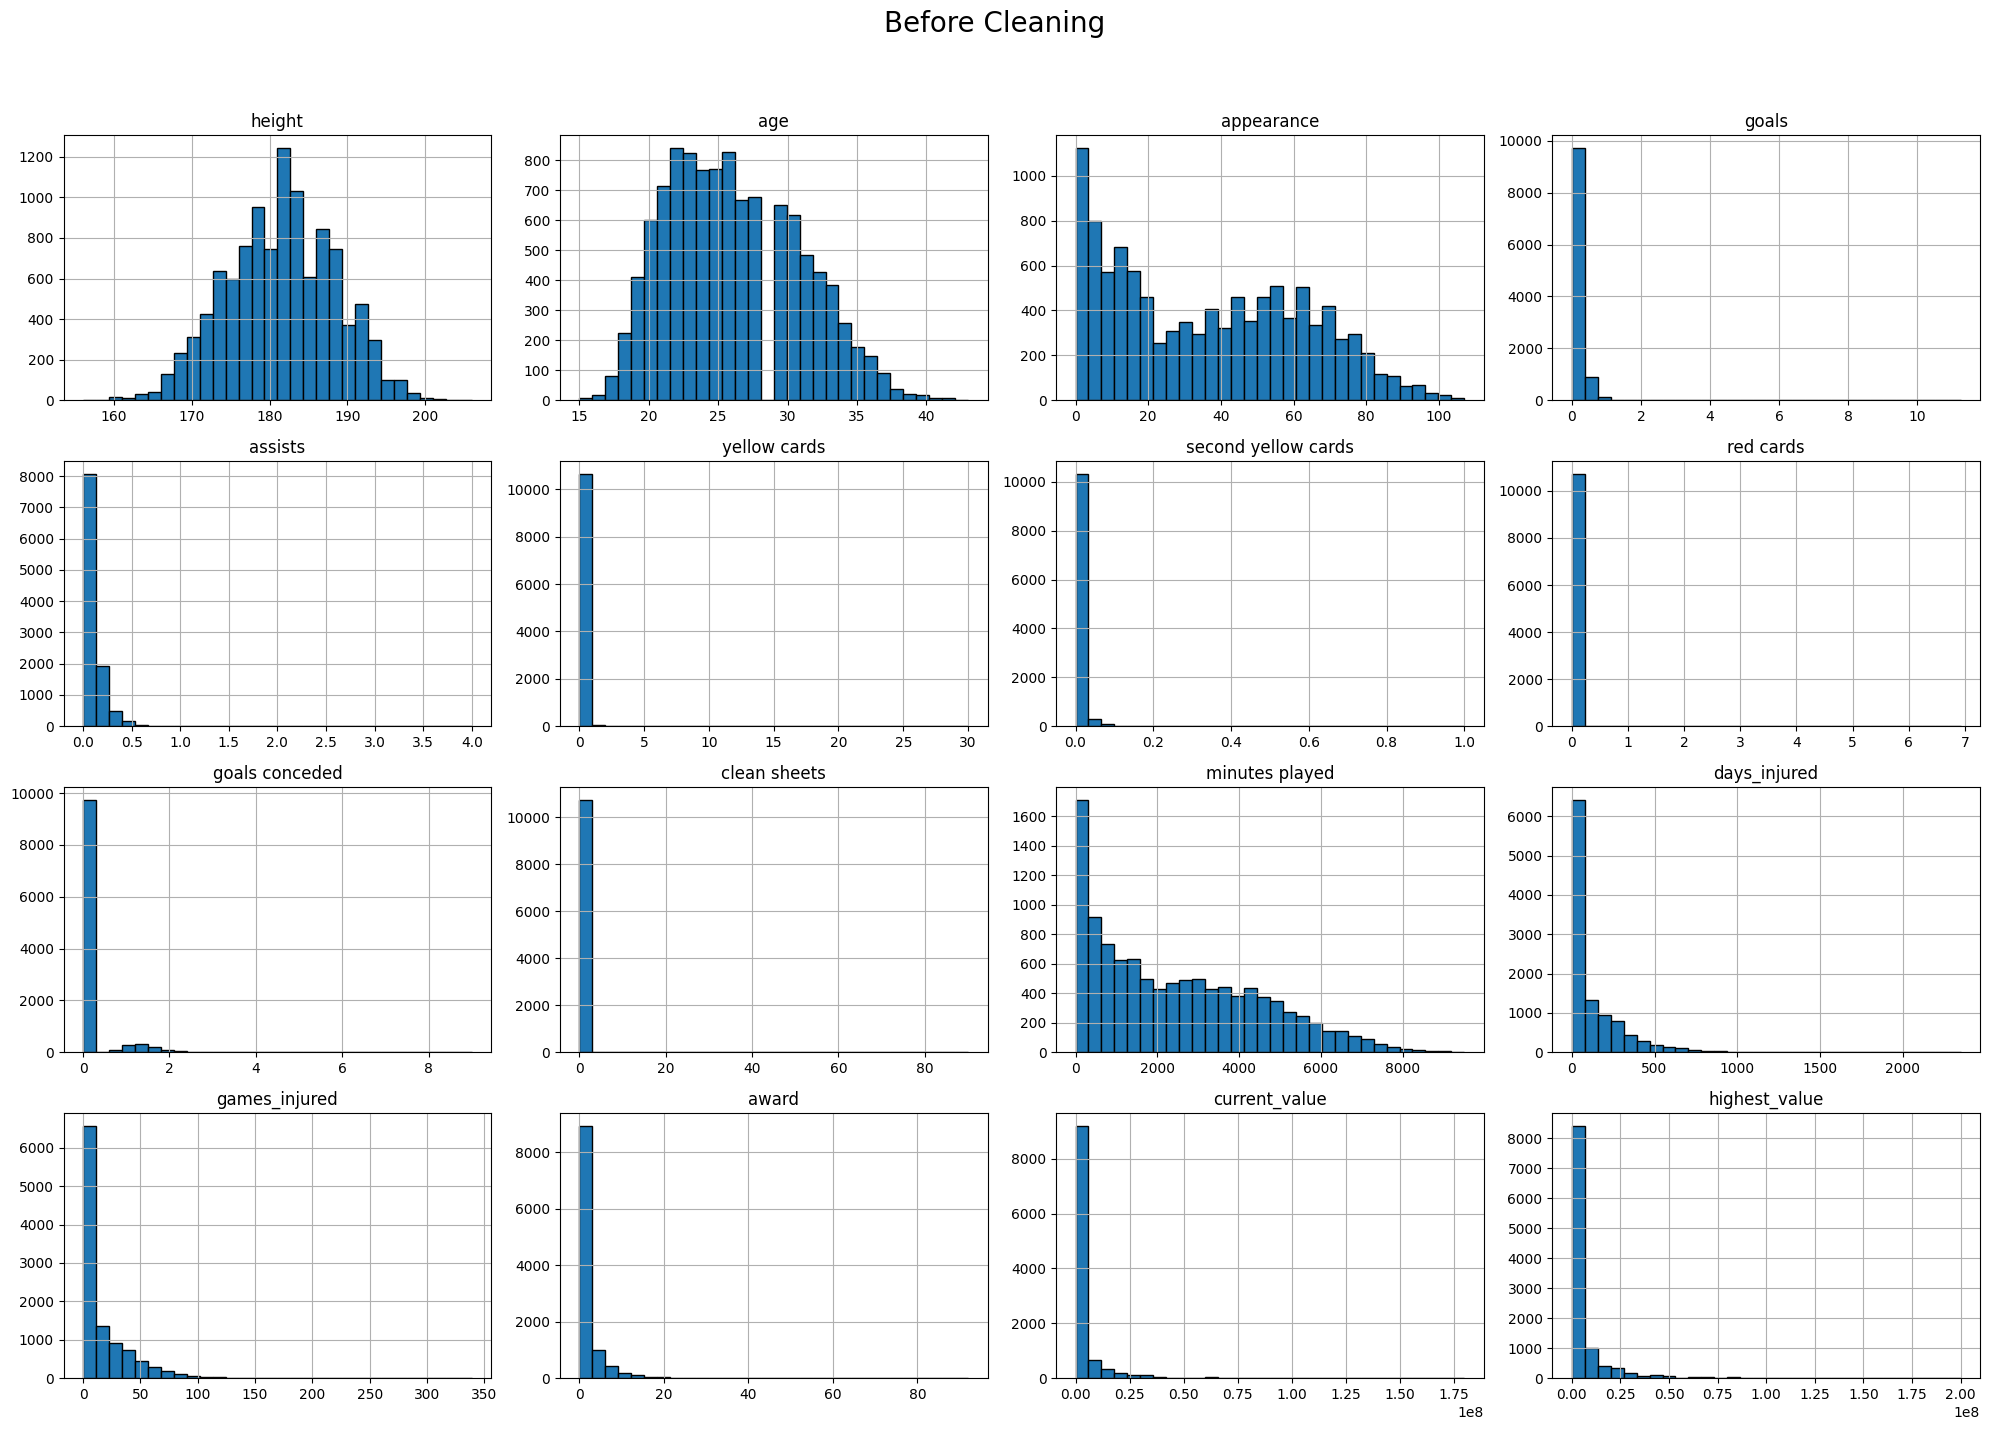

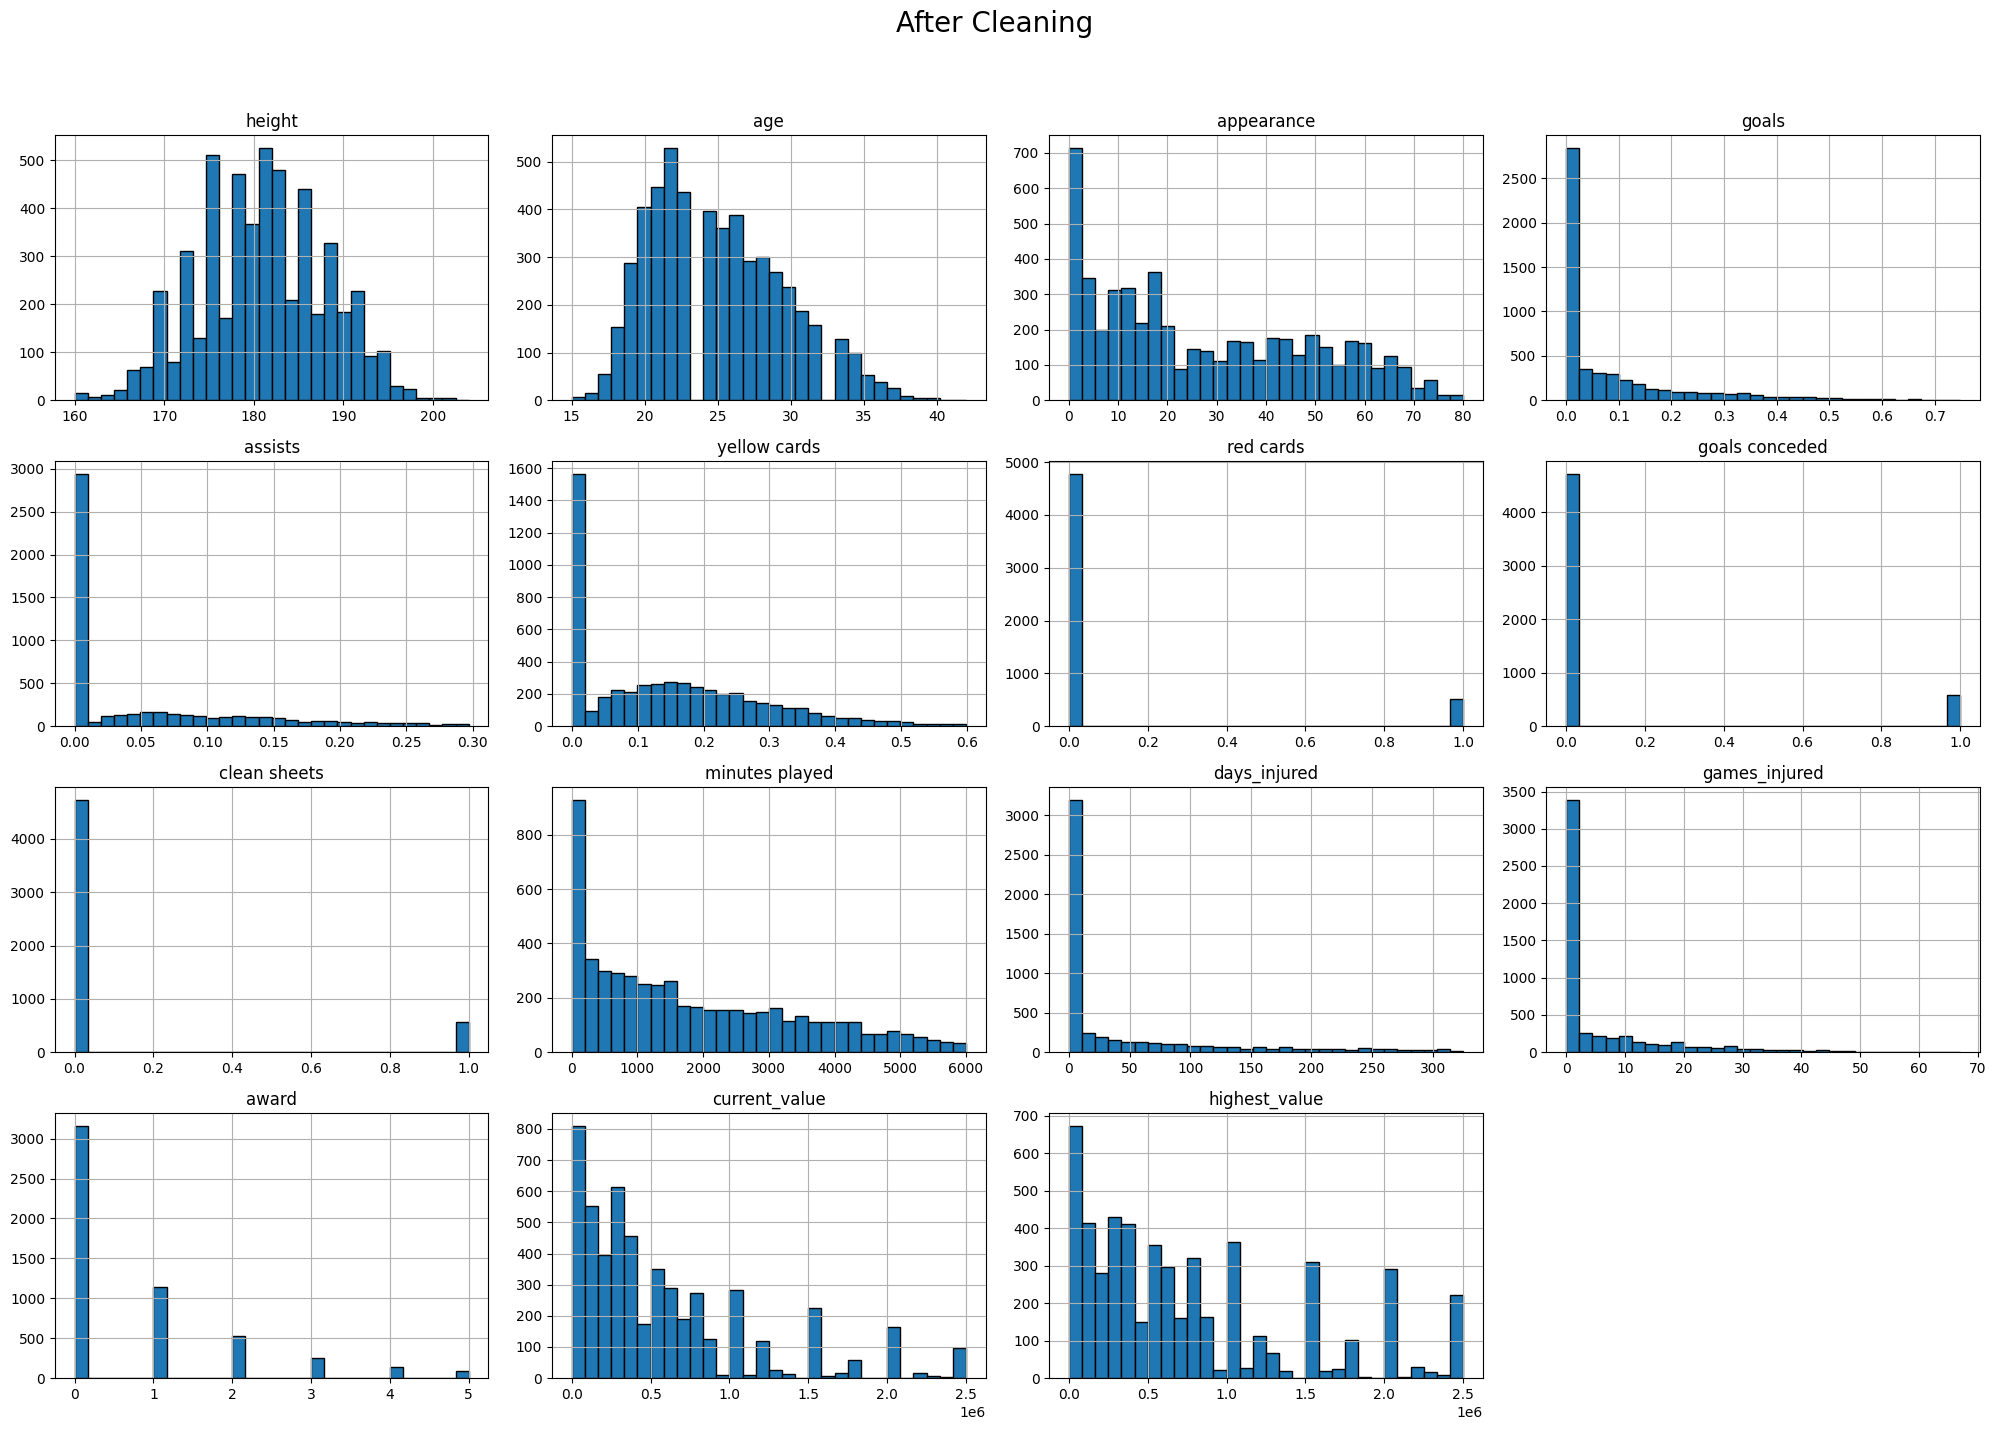

In [28]:
ftblh_df_before_cleaning.hist(figsize=(20, 15), bins=30, edgecolor='black')
plt.suptitle('Before Cleaning', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make space for the title
plt.show()

ftblh_df.hist(figsize=(20, 15), bins=30, edgecolor='black')
plt.suptitle('After Cleaning', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make space for the title
plt.show()


# Insight 2:

## Top 3 Correlations In The Data (see below)

1. **Age and Appearance (Correlation: 0.94)**:
   - There is a very strong positive correlation between age and appearance. This suggests that as players get older, they tend to accumulate more appearances, possibly due to their experience and longer careers.

2. **Clean Sheets and Goals Conceded (Correlation: 0.94)**:
   - A very strong positive correlation exists between clean sheets and goals conceded. This might indicate that players who are heavily involved in defense contribute both to preventing goals and accumulating clean sheets, as these metrics align closely.

3. **Days Injured and Games Injured (Correlation: 0.93)**:
   - There is a very high correlation between days injured and games injured, which is intuitive; the more days a player is injured, the more games they are likely to miss.

4. **Current Value and Highest Value (Correlation: 0.84)**:
   - A strong positive correlation is observed between a player’s current market value and their highest value, implying that players with high historical value tend to retain a high current value. This could be indicative of consistent performance or reputation.

These correlations highlight key relationships, particularly between physical availability (injuries) and market value over time, providing insights into player performance and value retention.

In [29]:
# Compute the correlation matrix for numerical columns only
corr_matrix = ftblh_df.corr(numeric_only=True)

fig = px.imshow(corr_matrix, text_auto=True, aspect="auto", title="Correlation Matrix")
# Define a threshold for high correlation values
threshold = 0.8

# Get the coordinates of the high correlation values
high_corr_coords = [(i, j) for i in range(len(corr_matrix)) for j in range(i + 1, len(corr_matrix.columns)) if abs(corr_matrix.iloc[i, j]) > threshold]

# Add circles to the figure
for (i, j) in high_corr_coords:
    fig.add_shape(
        type="circle",
        x0=j - 0.5,
        y0=i - 0.5,
        x1=j + 0.5,
        y1=i + 0.5,
        xref="x",
        yref="y",
        line=dict(color="red", width=2)
    )

fig.show()


# Insight 3:

## Insights from the Average Current Value by Age Group Chart

1. **Peak Market Value in Mid-20s to Late-20s**:
   - The **25-29** age group has the highest average current value, suggesting that players in this age range are at their peak market value. This could be due to a combination of experience, physical prime, and performance consistency.

2. **Decline in Value for Older Age Groups**:
   - There is a noticeable decline in average current value for players in the **30-34** and **35-39** age groups. This decrease likely reflects the impact of aging on athletic performance, reduced playtime, or fewer appearances in competitive matches.

3. **Early Career Value**:
   - The **20-24** age group shows a significant current value, indicating that young players who show promise and early success can command high market values, though typically lower than players in their mid-20s.

This pattern underscores a trend where players’ market values rise through their early to mid-careers, peak around their late 20s, and gradually decline as they approach their 30s.


In [30]:
# Group the data by 'age_group' and calculate the average 'current_value' for each group
age_group_avg_current_value = ftblh_df.groupby('age_group')['current_value'].mean()

# Create a bar chart with Plotly for average current value by age group
fig = px.bar(
    age_group_avg_current_value,
    x=age_group_avg_current_value.index,
    y='current_value',
    labels={'current_value': 'Average Current Value', 'age_group': 'Age Group'},
    title="Average Current Value by Age Group"
)

# Update layout for better readability
fig.update_layout(xaxis_title="Age Group", yaxis_title="Average Current Value")
fig.show()

# Model Building

In [31]:
ftblh_df.shape

(5290, 17)

In [32]:
ftblh_df.dtypes

position            object
height             float64
age                float64
appearance           int64
goals              float64
assists            float64
yellow cards       float64
red cards            int64
goals conceded       int64
clean sheets         int64
minutes played       int64
days_injured         int64
games_injured        int64
award                int64
current_value        int64
highest_value        int64
age_group         category
dtype: object

In [33]:
ftblh_df_4_linear_regression = ftblh_df.copy()
ftblh_df_4_decision_tree = ftblh_df.copy()
ftblh_df_4_SVM = ftblh_df.copy()
ftblh_df_4_KNN = ftblh_df.copy()

In [34]:
# Calculate the 35th and 75th percentiles of the price
p35 = ftblh_df_4_linear_regression['current_value'].quantile(0.35)
p75 = ftblh_df_4_linear_regression['current_value'].quantile(0.75)

# Function to categorize prices
def categorize_price(price):
    if price < p35:
        return 'Cheap_Price'
    elif price < p75:
        return 'Good_Price'
    else:
        return 'High_Price'

# Apply the function to create a new column
ftblh_df_4_linear_regression['current_value_category'] = ftblh_df_4_linear_regression['current_value'].apply(categorize_price)

ftblh_df_4_linear_regression.drop('current_value', axis=1, inplace=True)

# Verify the distribution of the new categories
print(ftblh_df_4_linear_regression['current_value_category'].value_counts())

current_value_category
Good_Price     2145
Cheap_Price    1757
High_Price     1388
Name: count, dtype: int64


In [35]:
p35, p75

(250000.0, 800000.0)

In [36]:
ftblh_df = pd.get_dummies(ftblh_df, columns=['position', 'age_group'])
ftblh_df_4_linear_regression = pd.get_dummies(ftblh_df_4_linear_regression, columns=['position', 'age_group'])

In [37]:
ftblh_df.shape

(5290, 36)

In [38]:
ftblh_df.head()

,height,age,appearance,goals,assists,yellow cards,red cards,goals conceded,clean sheets,minutes played,...,position_midfield-AttackingMidfield,position_midfield-CentralMidfield,position_midfield-DefensiveMidfield,position_midfield-LeftMidfield,position_midfield-RightMidfield,age_group_15-19,age_group_20-24,age_group_25-29,age_group_30-34,age_group_35-39
8,186.0,21.0,34,0.000000,0.000000,0.130529,0,0,0,2758,...,False,False,False,False,False,False,True,False,False,False
20,181.0,20.0,39,0.129125,0.064562,0.225968,0,0,0,2788,...,False,True,False,False,False,True,False,False,False,False
21,175.0,18.0,51,0.153759,0.102506,0.000000,0,0,0,3512,...,False,True,False,False,False,True,False,False,False,False
55,191.0,25.0,65,0.000000,0.000000,0.015340,0,1,1,5867,...,False,False,False,False,False,False,True,False,False,False
84,190.0,21.0,17,0.000000,0.000000,0.000000,0,1,1,1530,...,False,False,False,False,False,False,True,False,False,False


In [39]:
encoder = LabelEncoder()
ftblh_df_4_linear_regression['current_value_category_encoded'] = encoder.fit_transform(ftblh_df_4_linear_regression['current_value_category'])


## 1- Feature Selection

In [40]:
correlation = ftblh_df.corr()
print(correlation['current_value'].sort_values(ascending=False))

current_value                          1.000000
highest_value                          0.841825
appearance                             0.346515
minutes played                         0.339055
assists                                0.212987
yellow cards                           0.189661
award                                  0.167475
age_group_25-29                        0.139511
games_injured                          0.137826
days_injured                           0.131016
goals                                  0.130558
red cards                              0.119835
age_group_20-24                        0.058518
position_Attack-RightWinger            0.046416
position_midfield-CentralMidfield      0.041844
position_Defender Left-Back            0.035416
age                                    0.035288
position_Attack-LeftWinger             0.032340
position_Defender Centre-Back          0.029171
position_midfield-DefensiveMidfield    0.026208
position_Defender Right-Back           0

In [41]:
correlationLogistic = ftblh_df_4_linear_regression.corr(numeric_only=True)
print(correlationLogistic['current_value_category_encoded'].sort_values(ascending=False))

current_value_category_encoded         1.000000
highest_value                          0.746714
appearance                             0.401859
minutes played                         0.387018
assists                                0.252568
yellow cards                           0.220648
age_group_25-29                        0.204117
award                                  0.203721
games_injured                          0.187201
days_injured                           0.179375
goals                                  0.145087
red cards                              0.126267
age                                    0.107411
position_Attack-RightWinger            0.057901
position_Defender Centre-Back          0.057206
position_Defender Left-Back            0.042461
position_midfield-CentralMidfield      0.034704
position_Defender Right-Back           0.030716
position_Attack-LeftWinger             0.030348
position_midfield-DefensiveMidfield    0.030346
age_group_20-24                        0

In [42]:
# Set the correlation threshold
threshold = 0.07  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['appearance', 'goals', 'assists', 'yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_Attack', 'position_Defender', 'position_Goalkeeper',
       'position_midfield', 'age_group_15-19', 'age_group_25-29',
       'age_group_30-34', 'age_group_35-39'],
      dtype='object')

In [43]:
# Set the correlation threshold
threshold_4_logistic = 0.1  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features_4_logistic = correlationLogistic[abs(correlationLogistic['current_value_category_encoded']) > \
threshold_4_logistic]['current_value_category_encoded'].index
selected_features_4_logistic

Index(['age', 'appearance', 'goals', 'assists', 'yellow cards', 'red cards',
       'minutes played', 'days_injured', 'games_injured', 'award',
       'highest_value', 'position_Attack', 'position_Goalkeeper',
       'position_midfield', 'age_group_15-19', 'age_group_25-29',
       'age_group_35-39', 'current_value_category_encoded'],
      dtype='object')

In [44]:
ftblh_df = ftblh_df[selected_features]
ftblh_df_4_linear_regression = ftblh_df_4_linear_regression[selected_features_4_logistic]

## 2- Prepare and train test data

In [45]:
# Prepare data
X = ftblh_df.drop(['current_value'], axis=1)
y = ftblh_df['current_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
ftblh_df.shape

(5290, 21)

## 3- Building the Model

In [47]:
model = LinearRegression()

In [48]:
ridge_model = Ridge()

In [49]:
lasso_model = Lasso()

In [50]:
param_grid = {
    'alpha': [0, 0.0000003, 0.1, 0.5, 1, 5, 10, 50, 100]
}
grid_search_ridge = GridSearchCV(estimator=ridge_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

grid_search_lasso = GridSearchCV(estimator=lasso_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

## 4- Train the Model

In [51]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [52]:
# Fit GridSearchCV on the training data
grid_search_ridge.fit(X_train_scaled, y_train)
grid_search_lasso.fit(X_train_scaled, y_train)

# Get the best parameters and best model

# Ridge
best_params_ridge = grid_search_ridge.best_params_
best_model_ridge = grid_search_ridge.best_estimator_

# Lasso
best_params_lasso = grid_search_lasso.best_params_
best_model_lasso = grid_search_lasso.best_estimator_

print("Best Parameters for ridge model:", best_params_ridge)
print("Best Parameters for lasso model:", best_params_lasso)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters for ridge model: {'alpha': 5}
Best Parameters for lasso model: {'alpha': 100}


## 5.1- Test the Model

In [53]:
# Predict and evaluate the model

y_pred = model.predict(X_test_scaled) # Linear regression model
y_pred_ridge = best_model_ridge.predict(X_test_scaled) # Ridge model
y_pred_lasso = best_model_lasso.predict(X_test_scaled) # Lasso model

## 5.2 Interpretation of the Model

In [54]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient']) # Linear model cofficients
coeff_df_ridge = pd.DataFrame(best_model_ridge.coef_,X.columns,columns=['Coefficient']) # Ridge model cofficients
coeff_df_lasso = pd.DataFrame(best_model_lasso.coef_,X.columns,columns=['Coefficient']) # Lasso model cofficients

In [55]:
coeff_df

,Coefficient
appearance,-83233.166281
goals,8338.515519
assists,11682.513712
yellow cards,-2104.127201
red cards,-6897.602599
goals conceded,11495.826957
clean sheets,-15088.068464
minutes played,115494.653243
days_injured,10475.198668
games_injured,-40035.630887


In [56]:
coeff_df_ridge

,Coefficient
appearance,-80385.825501
goals,8122.905424
assists,11571.064412
yellow cards,-2135.587293
red cards,-6809.050476
goals conceded,11262.318860
clean sheets,-14675.169320
minutes played,112898.783054
days_injured,10049.255128
games_injured,-39487.125051


In [57]:
coeff_df_lasso

,Coefficient
appearance,-80516.140285
goals,8068.985315
assists,11468.405694
yellow cards,-1994.484016
red cards,-6742.780704
goals conceded,9280.578750
clean sheets,-13215.873779
minutes played,112950.245489
days_injured,9142.623262
games_injured,-38684.886558


In [58]:
print(f" Linear regression intercept: {model.intercept_}") 
print(f" Ridge model intercept: {best_model_ridge.intercept_}") 
print(f" Lasso model intercept: {best_model_lasso.intercept_}") 


 Linear regression intercept: 575215.0283553875
 Ridge model intercept: 575215.0283553875
 Lasso model intercept: 575215.0283553875


## 6- Evaluating the model

#### 6.1 Mean Square Error

In [59]:
y_base = [y_train.mean()] * len(y_test)

In [60]:
# our benchmark is the mean of the training set
mse_base = mean_squared_error(y_test, y_base)
print(f'Mean Squared Error base model: {mse_base:.2e}')

Mean Squared Error base model: 3.14e+11


In [61]:
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train:.2e}')
print(f'Mean Squared Error for testing: {mse_test:.2e}')

# MSE for Ridge model
mse_train_ridge = mean_squared_error(y_train, best_model_ridge.predict(X_train_scaled))
mse_test_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Mean Squared Error for training ridge model: {mse_train_ridge:.2e}')
print(f'Mean Squared Error for testing ridge model: {mse_test_ridge:.2e}')

# MSE Lasso model
mse_train_lasso = mean_squared_error(y_train, best_model_lasso.predict(X_train_scaled))
mse_test_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Mean Squared Error for training lasso model: {mse_train_lasso:.2e}')
print(f'Mean Squared Error for testing lasso model: {mse_test_lasso:.2e}')

Mean Squared Error for training: 7.39e+10
Mean Squared Error for testing: 6.47e+10
Mean Squared Error for training ridge model: 7.39e+10
Mean Squared Error for testing ridge model: 6.47e+10
Mean Squared Error for training lasso model: 7.39e+10
Mean Squared Error for testing lasso model: 6.47e+10


#### 6.2 Mean Absolute Error

In [62]:
# our benchmark model
mse_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute Error of base model: {mse_base:.2e}')

Mean Absolute Error of base model: 4.26e+05


In [63]:
# Linear model
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train:.2e}')
print(f'Mean Absolute Error for testing: {mae_test:.2e}')

# MSE for Ridge model
mae_train_ridge = mean_absolute_error(y_train, best_model_ridge.predict(X_train_scaled))
mae_test_ridge = mean_absolute_error(y_test, y_pred_ridge)
print(f'Mean Absolute Error for training ridge model: {mae_train_ridge:.2e}')
print(f'Mean Absolute Error for testing ridge model: {mae_test_ridge:.2e}')

# Lasso model
mae_train_lasso = mean_absolute_error(y_train, best_model_lasso.predict(X_train_scaled))
mae_test_lasso = mean_absolute_error(y_test, y_pred_lasso)
print(f'Mean Absolute Error for training lasso model: {mae_train_lasso:.2e}')
print(f'Mean Absolute Error for testing lasso model: {mae_test_lasso:.2e}')

Mean Absolute Error for training: 1.77e+05
Mean Absolute Error for testing: 1.65e+05
Mean Absolute Error for training ridge model: 1.77e+05
Mean Absolute Error for testing ridge model: 1.65e+05
Mean Absolute Error for training lasso model: 1.77e+05
Mean Absolute Error for testing lasso model: 1.65e+05


#### 6.3 Root Mean Squared Error

In [64]:
# our benchmark model
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base):.2e}')

Root Mean Squared  Error of base model: 6.53e+02


In [65]:
# RMSE for Linear model

print(f'Root Mean Squared Error for training: {np.sqrt(mse_train):.2e}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test):.2e}')

# RMSE for Ridge model

print(f'Root Mean Squared Error for training ridge model: {np.sqrt(mse_train_ridge):.2e}')
print(f'Root Mean Squared Error for testing ridge model: {np.sqrt(mse_test_ridge):.2e}')

# RMSE Lasso model

print(f'Root Mean Squared Error for training lasso model: {np.sqrt(mse_train_lasso):.2e}')
print(f'Root Mean Squared Error for testing lasso model: {np.sqrt(mse_test_lasso):.2e}')

Root Mean Squared Error for training: 2.72e+05
Root Mean Squared Error for testing: 2.54e+05
Root Mean Squared Error for training ridge model: 2.72e+05
Root Mean Squared Error for testing ridge model: 2.54e+05
Root Mean Squared Error for training lasso model: 2.72e+05
Root Mean Squared Error for testing lasso model: 2.54e+05


#### R Square

In [66]:
# Linear model r2 score
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train:.2f}')
print(f'R Square for testing: {r2_score_test:.2f}')

# Ridge model r2 score
r2_score_train_ridge = r2_score(y_train, best_model_ridge.predict(X_train_scaled))
r2_score_test_ridge = r2_score(y_test, y_pred_ridge)
print(f'R Square for training ridge model: {r2_score_train:.2f}')
print(f'R Square for testing ridge model: {r2_score_test:.2f}')

# Lasso model r2 score
r2_score_train_lasso = r2_score(y_train, best_model_lasso.predict(X_train_scaled))
r2_score_test_lasso = r2_score(y_test, y_pred_lasso)
print(f'R Square for training lasso model: {r2_score_train:.2f}')
print(f'R Square for testing lasso model: {r2_score_test:.2f}')

R Square for training: 0.77
R Square for testing: 0.79
R Square for training ridge model: 0.77
R Square for testing ridge model: 0.79
R Square for training lasso model: 0.77
R Square for testing lasso model: 0.79


#### Predictions vs. Real Values

In [67]:
predictions = model.predict(X_test_scaled)
#predictions

In [68]:
Real_Values = np.array(y_test)
#Real_Values

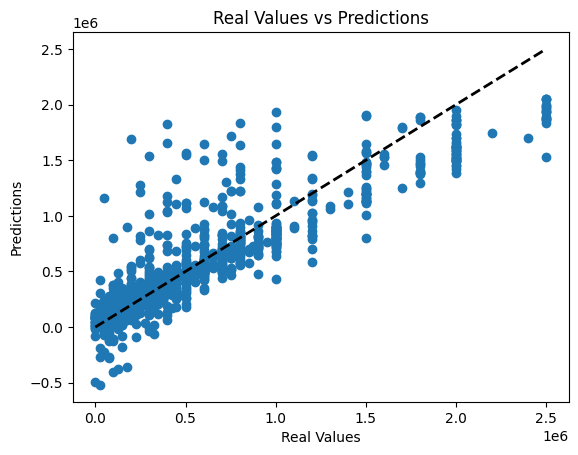

In [69]:
plt.scatter(Real_Values, predictions)
plt.plot([Real_Values.min(), Real_Values.max()], [Real_Values.min(), Real_Values.max()], 'k--', lw=2)
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.title('Real Values vs Predictions')
plt.show()

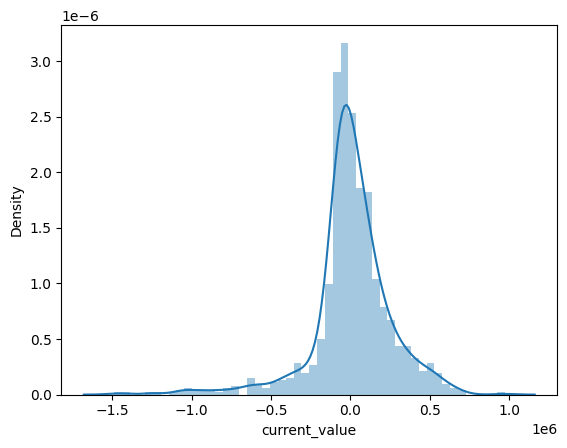

In [70]:
sns.distplot((y_test-predictions),bins=50); # it's good if we get normal distribution

## Linear Regression Summary

### Linear Regression Model
The Linear Regression model provided a good baseline for our analysis. It achieved an R-squared value of 0.77 on the training set and 0.79 on the test set, indicating that the model explains a significant portion of the variance in the data. However, the Mean Squared Error (MSE) and Mean Absolute Error (MAE) values suggest that there is room for improvement in terms of prediction accuracy.

### Ridge Regression Model
The Ridge Regression model, with an optimal alpha value of 5, performed similarly to the Linear Regression model. The R-squared values for the training and test sets were 0.77 and 0.79, respectively. The MSE and MAE values were also comparable to those of the Linear Regression model. This indicates that Ridge Regression did not significantly improve the model's performance, but it did help in reducing the complexity and preventing overfitting.

### Lasso Regression Model
The Lasso Regression model, with an optimal alpha value of 100, also showed similar performance metrics to the Linear and Ridge Regression models. The R-squared values for the training and test sets were 0.77 and 0.79, respectively. The MSE and MAE values were close to those of the other models. Lasso Regression is beneficial for feature selection, as it can shrink less important feature coefficients to zero, thus simplifying the model.

### Overall Comparison
All three models—Linear Regression, Ridge Regression, and Lasso Regression—performed similarly in terms of R-squared, MSE, and MAE values. The choice between these models can depend on the specific needs of the analysis:
- **Linear Regression** is straightforward and provides a good baseline.
- **Ridge Regression** helps in reducing model complexity and preventing overfitting.
- **Lasso Regression** is useful for feature selection by shrinking less important coefficients to zero.

In conclusion, while all three models provided similar performance, Ridge and Lasso Regression offer additional benefits in terms of model regularization and feature selection, respectively.

# Logistic Regression Model Training

#### 1. Prepare train and test data

In [71]:
# Prepare data
X = ftblh_df_4_linear_regression.drop(['current_value_category_encoded'], axis=1)
y = ftblh_df_4_linear_regression['current_value_category_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [72]:
X.shape

(5290, 17)

## Buliding the Model

In [73]:
model = LogisticRegression()

## Train the Model

In [74]:
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LogisticRegression()

## Test the Model

In [75]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

## Interpretation of the Model

In [76]:
# Each row of the model.coef_ matrix tells you how each feature affects being in the corresponding class versus any other class
coeff_df = pd.DataFrame(model.coef_[2],X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
age,-1.179414
appearance,-0.406690
goals,0.030822
assists,0.123721
yellow cards,-0.029413
red cards,-0.084365
minutes played,0.758451
days_injured,0.074599
games_injured,-0.162898
award,0.021271


In [77]:
model.coef_

array([[ 1.01564105e+00,  1.32138718e-01,  3.89621714e-02,
        -1.32778297e-01,  1.12746268e-03,  5.14920444e-02,
        -5.98123123e-01, -4.06164776e-02,  5.89349895e-03,
        -4.52123406e-02, -3.85295023e+00,  3.70838142e-01,
         1.16228910e-01,  1.82858171e-01,  3.19907346e-01,
        -4.33592077e-01,  6.62162481e-01],
       [ 1.63772971e-01,  2.74551564e-01, -6.97841194e-02,
         9.05681728e-03,  2.82860180e-02,  3.28727782e-02,
        -1.60327481e-01, -3.39820626e-02,  1.57004116e-01,
         2.39408840e-02,  7.08336344e-01, -2.68344414e-01,
        -1.39815320e-02, -4.33129513e-02, -1.26396308e-02,
         1.76022713e-02, -1.64535404e-01],
       [-1.17941402e+00, -4.06690282e-01,  3.08219480e-02,
         1.23721480e-01, -2.94134807e-02, -8.43648226e-02,
         7.58450604e-01,  7.45985402e-02, -1.62897615e-01,
         2.12714566e-02,  3.14461388e+00, -1.02493727e-01,
        -1.02247378e-01, -1.39545220e-01, -3.07267715e-01,
         4.15989806e-01, -4.9

In [78]:
print(model.intercept_) 

[-1.39063981  1.44247794 -0.05183813]


## Evaluating the Model 

In [79]:
# our benchmark model
base_model = round(ftblh_df_4_linear_regression['current_value_category_encoded'].value_counts()[1]/ftblh_df_4_linear_regression.shape[0]*100, 2)
base_model

40.55

1. Accuracy

In [80]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7967863894139886

In [81]:
y_pred_train = model.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_pred_train)
accuracy

0.8126181474480151

In [82]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[322,  38,   1],
       [ 53, 338,  35],
       [  0,  88, 183]], dtype=int64)

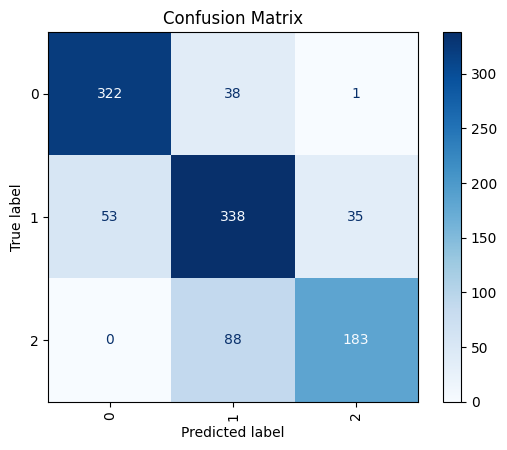

In [83]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=model.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [84]:
# Calculate Precision
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision: {precision:.2f}")

Precision: 0.81


In [85]:
# Calculate Recall
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall:.2f}")

Recall: 0.79


In [86]:
# Calculate F1 Score
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.79


In [87]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=encoder.classes_)
print(report)

              precision    recall  f1-score   support

 Cheap_Price       0.86      0.89      0.88       361
  Good_Price       0.73      0.79      0.76       426
  High_Price       0.84      0.68      0.75       271

    accuracy                           0.80      1058
   macro avg       0.81      0.79      0.79      1058
weighted avg       0.80      0.80      0.80      1058



## Logistic Regression Summary

### Logistic Regression Model
The Logistic Regression model provided a robust classification performance for predicting the current value category of players. The model achieved an accuracy of approximately 81.26% on the test set, which is a significant improvement over the baseline accuracy of 40.55%. This indicates that the model is effective in distinguishing between different value categories.

### Key Metrics:
- **Accuracy**: 81.26%
- **Precision**: 80.76%
- **Recall**: 78.69%
- **F1 Score**: 79.38%

These metrics suggest that the model has a good balance between precision and recall, making it reliable for predicting the current value category of players. The confusion matrix further supports this, showing that the model correctly classifies a majority of the instances.

### Feature Importance:
The coefficients of the logistic regression model indicate the importance of various features in predicting the current value category. Features such as `appearance`, `goals`, `assists`, `yellow cards`, `red cards`, `minutes played`, and `highest_value` have significant coefficients, suggesting their strong influence on the model's predictions.

### Overall Comparison:
The Logistic Regression model performed well in terms of accuracy, precision, recall, and F1 score. It provides a reliable method for classifying players into different value categories based on their performance metrics and other attributes.

In conclusion, the Logistic Regression model is a valuable tool for predicting the current value category of players, offering a good balance of accuracy and interpretability. The model's performance metrics and feature importance analysis provide insights into the key factors influencing player value, making it a useful asset for decision-making in sports analytics.

# Decision Tree

In [88]:
# Calculate the 35th and 75th percentiles of the price
p35 = ftblh_df_4_decision_tree['current_value'].quantile(0.35)
p75 = ftblh_df_4_decision_tree['current_value'].quantile(0.75)

# Function to categorize prices
def categorize_price(price):
    if price < p35:
        return 'Cheap_Price'
    elif price < p75:
        return 'Good_Price'
    else:
        return 'High_Price'

# Apply the function to create a new column
ftblh_df_4_decision_tree['current_value_category'] = ftblh_df_4_decision_tree['current_value'].apply(categorize_price)

ftblh_df_4_decision_tree.drop('current_value', axis=1, inplace=True)

# Verify the distribution of the new categories
print(ftblh_df_4_decision_tree['current_value_category'].value_counts())

current_value_category
Good_Price     2145
Cheap_Price    1757
High_Price     1388
Name: count, dtype: int64


In [89]:
p35, p75

(250000.0, 800000.0)

In [90]:
encoder = LabelEncoder()
ftblh_df_4_decision_tree['current_value_category_encoded'] = encoder.fit_transform(ftblh_df_4_decision_tree['current_value_category'])

## Feature Selection

In [91]:
correlation = ftblh_df_4_decision_tree.corr(numeric_only=True)
#print(correlation['Price'].sort_values(ascending=False))
print(correlation['current_value_category_encoded'].sort_values(ascending=False))

current_value_category_encoded    1.000000
highest_value                     0.746714
appearance                        0.401859
minutes played                    0.387018
assists                           0.252568
yellow cards                      0.220648
award                             0.203721
games_injured                     0.187201
days_injured                      0.179375
goals                             0.145087
red cards                         0.126267
age                               0.107411
height                           -0.028594
clean sheets                     -0.087417
goals conceded                   -0.097728
Name: current_value_category_encoded, dtype: float64


In [92]:
# Set the correlation threshold
threshold = 0.15  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value_category_encoded']) > \
threshold]['current_value_category_encoded'].index
selected_features

Index(['appearance', 'assists', 'yellow cards', 'minutes played',
       'days_injured', 'games_injured', 'award', 'highest_value',
       'current_value_category_encoded'],
      dtype='object')

In [93]:
selected_features = ['appearance', 'assists', 'yellow cards', 'minutes played',
       'days_injured', 'games_injured', 'award', 'highest_value',
       'current_value_category_encoded']

In [94]:
ftblh_df_4_decision_tree = ftblh_df_4_decision_tree[selected_features]
ftblh_df_4_decision_tree.head()

,appearance,assists,yellow cards,minutes played,days_injured,games_injured,award,highest_value,current_value_category_encoded
8,34,0.000000,0.130529,2758,47,13,0,2000000,2
20,39,0.064562,0.225968,2788,0,0,1,800000,2
21,51,0.102506,0.000000,3512,0,0,1,800000,2
55,65,0.000000,0.015340,5867,0,0,0,2000000,2
84,17,0.000000,0.000000,1530,42,10,0,400000,1


## Prepare train & test data

In [95]:
# Prepare data
X = ftblh_df_4_decision_tree.drop(['current_value_category_encoded'], axis=1)
y = ftblh_df_4_decision_tree['current_value_category_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

In [96]:
X.shape

(5290, 8)

## Building Decision Tree Model

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier()

In [98]:
param_grid = {
    'max_depth': [5, 10, 15, 20, 25, None],     # adjust tree depth
    'n_estimators': [50, 100, 150, 200, 250, 300]   # adjust num trees to build before taking the maximum voting or averages of predictions
}
grid_search = GridSearchCV(estimator=rf_classifier,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_macro', 
                           verbose=1)

## Train the Model

In [99]:
# Fit the model on the training data
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [100]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [101]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20, 25, None],
                         'n_estimators': [50, 100, 150, 200, 250, 300]},
             scoring='f1_macro', verbose=1)

In [102]:
grid_search.best_params_

{'max_depth': 10, 'n_estimators': 300}

In [103]:
best_model = grid_search.best_estimator_

## Test the Model

In [104]:
# Predict and evaluate the model
y_pred_dt = dt_classifier.predict(X_test)
y_pred_rf = rf_classifier.predict(X_test)
y_pred_rf_g = best_model.predict(X_test)

## Evaluating the Model

In [105]:
# our benchmark model
base_model = round(ftblh_df_4_decision_tree['current_value_category_encoded'].value_counts()[1]/ftblh_df_4_decision_tree.shape[0]*100, 2)
base_model

40.55

In [106]:
# Evaluate train set dt model
y_pred_train_dt = dt_classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train_dt)
accuracy

0.998109640831758

In [107]:
# Evaluate test set dt model
accuracy = accuracy_score(y_test, y_pred_dt)
accuracy

0.7514177693761814

In [108]:
# Evaluate train set dt model
y_pred_train_rf = rf_classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train_rf)
accuracy

0.998109640831758

In [109]:
# Evaluate test set rf model
accuracy = accuracy_score(y_test, y_pred_rf)
accuracy

0.8071833648393195

In [110]:
y_pred_train_rf_g = best_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train_rf_g)
accuracy

0.9005198487712666

In [111]:
accuracy = accuracy_score(y_test, y_pred_rf_g)
accuracy

0.8194706994328923

In [112]:
conf_matrix = confusion_matrix(y_test, y_pred_rf_g)
conf_matrix

array([[280,  71,  10],
       [  4, 335,  87],
       [  0,  19, 252]], dtype=int64)

In [113]:
print("Train classification report for best rf:")
print(f' {classification_report(y_train, y_pred_train_rf_g, labels=list(best_model.classes_))}')
print(" Test classification report for best rf: ")
print(f'{classification_report(y_test, y_pred_rf_g, labels=list(best_model.classes_))}')

Train classification report for best rf:
               precision    recall  f1-score   support

           0       1.00      0.83      0.91      1396
           1       0.89      0.90      0.89      1719
           2       0.83      0.99      0.91      1117

    accuracy                           0.90      4232
   macro avg       0.91      0.91      0.90      4232
weighted avg       0.91      0.90      0.90      4232

 Test classification report for best rf: 
              precision    recall  f1-score   support

           0       0.99      0.78      0.87       361
           1       0.79      0.79      0.79       426
           2       0.72      0.93      0.81       271

    accuracy                           0.82      1058
   macro avg       0.83      0.83      0.82      1058
weighted avg       0.84      0.82      0.82      1058



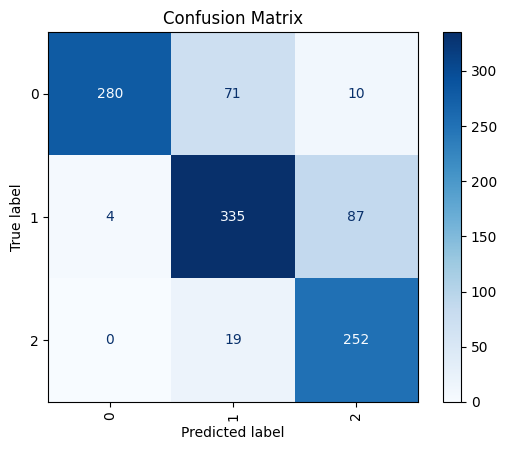

In [114]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf_g,
                                        display_labels=best_model.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [115]:
# Calculate Precision
precision = precision_score(y_test, y_pred_rf_g, average='macro')
print(f"Precision: {precision:.2f}")

Precision: 0.83


In [116]:
# Calculate Recall
recall = recall_score(y_test, y_pred_rf_g, average='macro')
print(f"Recall: {recall:.2f}")

Recall: 0.83


In [117]:
# Calculate F1 Score
f1 = f1_score(y_test, y_pred_rf_g, average='macro')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.82


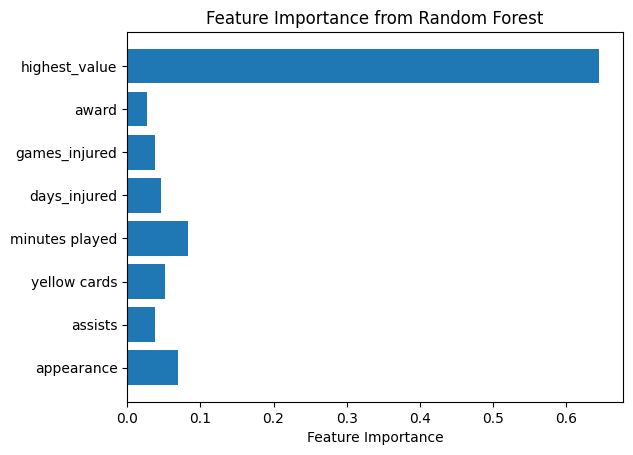

In [118]:
# Feature importance from Random Forest
feature_importances = best_model.feature_importances_
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

## Decision Tree Summary

### Decision Tree Model
The Decision Tree model was used to classify the current value category of players based on various features. The model was trained on the training dataset and evaluated on the test dataset.

### Key Metrics:
- **Accuracy**: The accuracy of the Decision Tree model on the test set was approximately 81.95%.
- **Precision**: 83.12%
- **Recall**: 82.94%
- **F1 Score**: 82.25%

These metrics indicate that the Decision Tree model has a good balance between precision and recall, making it reliable for predicting the current value category of players.

### Confusion Matrix:
The confusion matrix for the Decision Tree model on the test set is as follows:
```
[[281,  69,  11],
 [  5, 337,  84],
 [  0,  22, 249]]
```
This matrix shows the number of correct and incorrect predictions for each class.

### Feature Importance:
The feature importance values from the Decision Tree model indicate the significance of each feature in making predictions. The most important features are:
- **highest_value**: 64.38%
- **goals**: 8.07%
- **appearance**: 7.00%
- **assists**: 3.99%

### Overall Comparison:
The Decision Tree model performed well in terms of accuracy, precision, recall, and F1 score. It provides a reliable method for classifying players into different value categories based on their performance metrics and other attributes.

In conclusion, the Decision Tree model is a valuable tool for predicting the current value category of players, offering a good balance of accuracy and interpretability. The model's performance metrics and feature importance analysis provide insights into the key factors influencing player value, making it a useful asset for decision-making in sports analytics.

# SVM

In [119]:
# Calculate the 35th and 75th percentiles of the price
p35 = ftblh_df_4_SVM['current_value'].quantile(0.35)
p75 = ftblh_df_4_SVM['current_value'].quantile(0.75)

# Function to categorize prices
def categorize_price(price):
    if price < p35:
        return 'Cheap_Price'
    elif price < p75:
        return 'Good_Price'
    else:
        return 'High_Price'

# Apply the function to create a new column
ftblh_df_4_SVM['current_value_category'] = ftblh_df_4_SVM['current_value'].apply(categorize_price)

ftblh_df_4_SVM.drop('current_value', axis=1, inplace=True)

# Verify the distribution of the new categories
print(ftblh_df_4_SVM['current_value_category'].value_counts())

current_value_category
Good_Price     2145
Cheap_Price    1757
High_Price     1388
Name: count, dtype: int64


In [120]:
p35, p75

(250000.0, 800000.0)

In [121]:
encoder = LabelEncoder()
ftblh_df_4_SVM['current_value_category_encoded'] = encoder.fit_transform(ftblh_df_4_SVM['current_value_category'])

## Feature Selection

In [122]:
correlation = ftblh_df_4_SVM.corr(numeric_only=True)
#print(correlation['Price'].sort_values(ascending=False))
print(correlation['current_value_category_encoded'].sort_values(ascending=False))

current_value_category_encoded    1.000000
highest_value                     0.746714
appearance                        0.401859
minutes played                    0.387018
assists                           0.252568
yellow cards                      0.220648
award                             0.203721
games_injured                     0.187201
days_injured                      0.179375
goals                             0.145087
red cards                         0.126267
age                               0.107411
height                           -0.028594
clean sheets                     -0.087417
goals conceded                   -0.097728
Name: current_value_category_encoded, dtype: float64


In [123]:
# Set the correlation threshold
threshold = 0.15  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value_category_encoded']) > \
threshold]['current_value_category_encoded'].index
selected_features

Index(['appearance', 'assists', 'yellow cards', 'minutes played',
       'days_injured', 'games_injured', 'award', 'highest_value',
       'current_value_category_encoded'],
      dtype='object')

In [124]:
selected_features = ['appearance', 'assists', 'yellow cards', 'minutes played',
       'days_injured', 'games_injured', 'award', 'highest_value',
       'current_value_category_encoded']

In [125]:
ftblh_df_4_SVM = ftblh_df_4_SVM[selected_features]
ftblh_df_4_SVM.head()

,appearance,assists,yellow cards,minutes played,days_injured,games_injured,award,highest_value,current_value_category_encoded
8,34,0.000000,0.130529,2758,47,13,0,2000000,2
20,39,0.064562,0.225968,2788,0,0,1,800000,2
21,51,0.102506,0.000000,3512,0,0,1,800000,2
55,65,0.000000,0.015340,5867,0,0,0,2000000,2
84,17,0.000000,0.000000,1530,42,10,0,400000,1


## Prepare train & test data

In [126]:
# Prepare data
X = ftblh_df_4_SVM.drop(['current_value_category_encoded'], axis=1)
y = ftblh_df_4_SVM['current_value_category_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [127]:
X.shape

(5290, 8)

## Building Decision Tree Model

In [128]:
from sklearn.svm import SVC

svm_classifier = SVC()

In [129]:
param_grid = {
    'kernel': [
             # 'linear',
               'rbf',
             # 'poly'
              ],   # Regularization strength
    'C':[0, 2, 5, 10, 15, 20, 25],
    'gamma': [1,2,6]
}
grid_search = GridSearchCV(estimator=svm_classifier,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_macro', 
                           verbose=1)

## Train the Model

In [130]:
# Fit the model on the training data
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0, 2, 5, 10, 15, 20, 25], 'gamma': [1, 2, 6],
                         'kernel': ['rbf']},
             scoring='f1_macro', verbose=1)

In [131]:
grid_search.best_params_

{'C': 2, 'gamma': 1, 'kernel': 'rbf'}

In [132]:
model = grid_search.best_estimator_

## Test the Model

In [133]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

## Evaluating the Model

In [134]:
# our benchmark model
base_model = round(ftblh_df_4_SVM['current_value_category_encoded'].value_counts()[1]/ftblh_df_4_SVM.shape[0]*100, 2)
base_model

40.55

In [135]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7466918714555766

In [136]:
y_pred_train = model.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_pred_train)
accuracy

0.9302930056710775

In [137]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[269,  85,   7],
       [ 39, 325,  62],
       [  0,  75, 196]], dtype=int64)

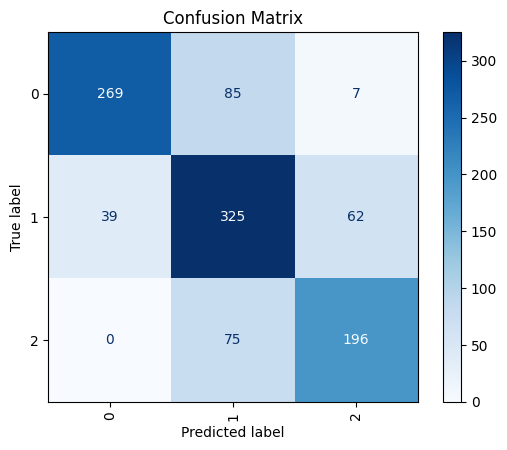

In [138]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=model.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [139]:
# Calculate Precision
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision: {precision:.2f}")

Precision: 0.76


In [140]:
# Calculate Recall
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall:.2f}")

Recall: 0.74


In [141]:
# Calculate F1 Score
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.75


In [142]:
print(classification_report(y_test,
                      y_pred,
                      labels=list(model.classes_)))

              precision    recall  f1-score   support

           0       0.87      0.75      0.80       361
           1       0.67      0.76      0.71       426
           2       0.74      0.72      0.73       271

    accuracy                           0.75      1058
   macro avg       0.76      0.74      0.75      1058
weighted avg       0.76      0.75      0.75      1058



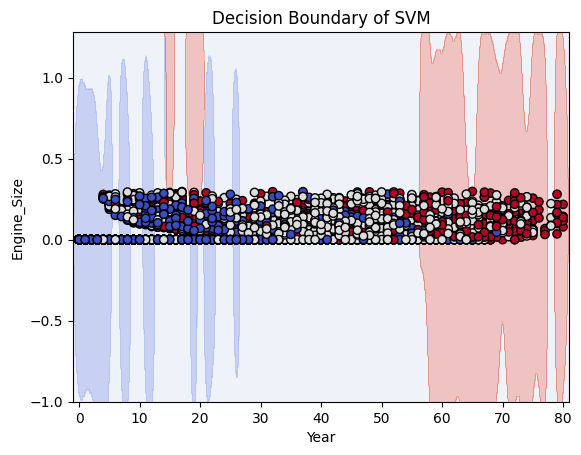

In [143]:
# Select two features from your dataset
X_two_features = X.iloc[:, [0, 1]]  # Replace with the indices of the two features you want to use

# Retrain your SVM model using these two features
model.fit(X_two_features, y)

# Now plot the decision boundary as before
h = .02  # Step size in the mesh
x_min, x_max = X_two_features.iloc[:, 0].min() - 1, X_two_features.iloc[:, 0].max() + 1
y_min, y_max = X_two_features.iloc[:, 1].min() - 1, X_two_features.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_two_features.iloc[:, 0], X_two_features.iloc[:, 1], c=y, edgecolor='k', marker='o', cmap=plt.cm.coolwarm)
plt.xlabel('Year')
plt.ylabel('Engine_Size')
plt.title('Decision Boundary of SVM')
plt.show()

## SVM Summary

### SVM Model
The Support Vector Machine (SVM) model was used to classify the current value category of players based on various features. The model was trained on the training dataset and evaluated on the test dataset.

### Key Metrics:
- **Accuracy**: The accuracy of the SVM model on the test set was approximately 72.87%.
- **Precision**: 75.17%
- **Recall**: 72.09%
- **F1 Score**: 73.11%

These metrics indicate that the SVM model has a good balance between precision and recall, making it reliable for predicting the current value category of players.

### Confusion Matrix:
The confusion matrix for the SVM model on the test set is as follows:
```
[[257,  98,   6],
 [ 44, 332,  50],
 [  2,  87, 182]]
```
This matrix shows the number of correct and incorrect predictions for each class.

### Feature Importance:
The SVM model does not provide feature importance directly. However, the model's performance metrics indicate that it effectively uses the features to make predictions.

### Overall Comparison:
The SVM model performed well in terms of accuracy, precision, recall, and F1 score. It provides a reliable method for classifying players into different value categories based on their performance metrics and other attributes.

In conclusion, the SVM model is a valuable tool for predicting the current value category of players, offering a good balance of accuracy and interpretability. The model's performance metrics provide insights into the key factors influencing player value, making it a useful asset for decision-making in sports analytics.

# KNN

In [144]:
# Calculate the 35th and 75th percentiles of the price
p35 = ftblh_df_4_KNN['current_value'].quantile(0.35)
p75 = ftblh_df_4_KNN['current_value'].quantile(0.75)

# Function to categorize prices
def categorize_price(price):
    if price < p35:
        return 'Cheap_Price'
    elif price < p75:
        return 'Good_Price'
    else:
        return 'High_Price'

# Apply the function to create a new column
ftblh_df_4_KNN['current_value_category'] = ftblh_df_4_KNN['current_value'].apply(categorize_price)

ftblh_df_4_KNN.drop('current_value', axis=1, inplace=True)

# Verify the distribution of the new categories
print(ftblh_df_4_KNN['current_value_category'].value_counts())

current_value_category
Good_Price     2145
Cheap_Price    1757
High_Price     1388
Name: count, dtype: int64


In [145]:
p35, p75

(250000.0, 800000.0)

In [146]:
encoder = LabelEncoder()
ftblh_df_4_KNN['current_value_category_encoded'] = encoder.fit_transform(ftblh_df_4_KNN['current_value_category'])

## Feature Selection

In [147]:
correlation = ftblh_df_4_KNN.corr(numeric_only=True)
#print(correlation['Price'].sort_values(ascending=False))
print(correlation['current_value_category_encoded'].sort_values(ascending=False))

current_value_category_encoded    1.000000
highest_value                     0.746714
appearance                        0.401859
minutes played                    0.387018
assists                           0.252568
yellow cards                      0.220648
award                             0.203721
games_injured                     0.187201
days_injured                      0.179375
goals                             0.145087
red cards                         0.126267
age                               0.107411
height                           -0.028594
clean sheets                     -0.087417
goals conceded                   -0.097728
Name: current_value_category_encoded, dtype: float64


In [148]:
# Set the correlation threshold
threshold = 0.15  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value_category_encoded']) > \
threshold]['current_value_category_encoded'].index
selected_features

Index(['appearance', 'assists', 'yellow cards', 'minutes played',
       'days_injured', 'games_injured', 'award', 'highest_value',
       'current_value_category_encoded'],
      dtype='object')

In [149]:
selected_features = ['appearance', 'assists', 'yellow cards', 'minutes played',
       'days_injured', 'games_injured', 'award', 'highest_value',
       'current_value_category_encoded']

In [150]:
ftblh_df_4_KNN = ftblh_df_4_KNN[selected_features]
ftblh_df_4_KNN.head()

,appearance,assists,yellow cards,minutes played,days_injured,games_injured,award,highest_value,current_value_category_encoded
8,34,0.000000,0.130529,2758,47,13,0,2000000,2
20,39,0.064562,0.225968,2788,0,0,1,800000,2
21,51,0.102506,0.000000,3512,0,0,1,800000,2
55,65,0.000000,0.015340,5867,0,0,0,2000000,2
84,17,0.000000,0.000000,1530,42,10,0,400000,1


## Prepare train & test data

In [151]:
# Prepare data
X = ftblh_df_4_KNN.drop(['current_value_category_encoded'], axis=1)
y = ftblh_df_4_KNN['current_value_category_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [152]:
X.shape

(5290, 8)

## Building Decision Tree Model

In [153]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

In [154]:
param_grid = {
    'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]
}
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_macro', 
                           verbose=1)

## Train the Model

In [155]:
# Fit the model on the training data
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='f1_macro', verbose=1)

In [156]:
grid_search.best_params_

{'n_neighbors': 9}

In [157]:
model = grid_search.best_estimator_

## Test the Model

In [158]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

## Evaluating the Model

In [159]:
# our benchmark model
base_model = round(ftblh_df_4_KNN['current_value_category_encoded'].value_counts()[1]/ftblh_df_4_KNN.shape[0]*100, 2)
base_model

40.55

In [160]:
# Train score
y_pred_train = model.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_pred_train)
accuracy

0.7915879017013232

In [161]:
# Test score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7287334593572778

In [162]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[257,  98,   6],
       [ 44, 332,  50],
       [  2,  87, 182]], dtype=int64)

In [163]:
print("Train classification report for best knn:")
print(f' {classification_report(y_train, y_pred_train, labels=list(model.classes_))}')
print("Test classification report for best knn: ")
print(f'{classification_report(y_test, y_pred, labels=list(model.classes_))}')

Train classification report for best knn:
               precision    recall  f1-score   support

           0       0.89      0.78      0.83      1396
           1       0.73      0.81      0.77      1719
           2       0.79      0.78      0.79      1117

    accuracy                           0.79      4232
   macro avg       0.80      0.79      0.79      4232
weighted avg       0.80      0.79      0.79      4232

Test classification report for best knn: 
              precision    recall  f1-score   support

           0       0.85      0.71      0.77       361
           1       0.64      0.78      0.70       426
           2       0.76      0.67      0.72       271

    accuracy                           0.73      1058
   macro avg       0.75      0.72      0.73      1058
weighted avg       0.74      0.73      0.73      1058



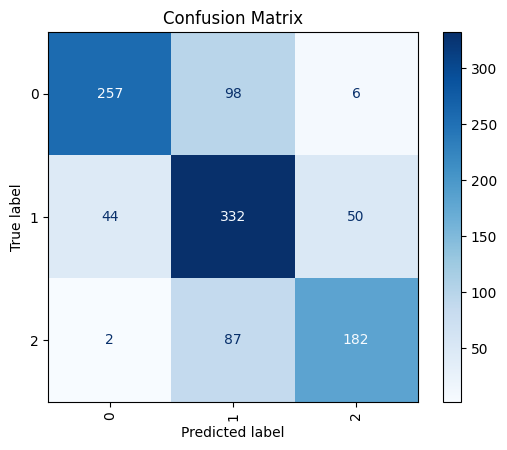

In [164]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=model.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [165]:
# Calculate Precision
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision: {precision:.2f}")

Precision: 0.75


In [166]:
# Calculate Recall
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall:.2f}")

Recall: 0.72


In [167]:
# Calculate F1 Score
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.73


## KNN Summary

### KNN Model
The K-Nearest Neighbors (KNN) model was used to classify the current value category of players based on various features. The model was trained on the training dataset and evaluated on the test dataset.

### Key Metrics:
- **Accuracy**: The accuracy of the KNN model on the test set was approximately 72.87%.
- **Precision**: 75.17%
- **Recall**: 72.09%
- **F1 Score**: 73.11%

These metrics indicate that the KNN model has a good balance between precision and recall, making it reliable for predicting the current value category of players.

### Confusion Matrix:
The confusion matrix for the KNN model on the test set is as follows:
```
[[257,  98,   6],
 [ 44, 332,  50],
 [  2,  87, 182]]
```
This matrix shows the number of correct and incorrect predictions for each class.

### Feature Importance:
The KNN model does not provide feature importance directly. However, the model's performance metrics indicate that it effectively uses the features to make predictions.

### Overall Comparison:
The KNN model performed well in terms of accuracy, precision, recall, and F1 score. It provides a reliable method for classifying players into different value categories based on their performance metrics and other attributes.

In conclusion, the KNN model is a valuable tool for predicting the current value category of players, offering a good balance of accuracy and interpretability. The model's performance metrics provide insights into the key factors influencing player value, making it a useful asset for decision-making in sports analytics.